In [21]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Ler os dados
Base_Dados = pd.read_csv('unicorns till sep 2022.csv',sep=',')

Base_Dados

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


In [23]:

# Verificar Dimensão
Base_Dados.shape

(1186, 7)

In [24]:
# Columnas
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [25]:
# Renomear
Base_Dados.rename( columns={
    '' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True )

In [26]:
# Verificar Tipo do informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [27]:
# Campos nulos
Base_Dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investors         18
dtype: int64

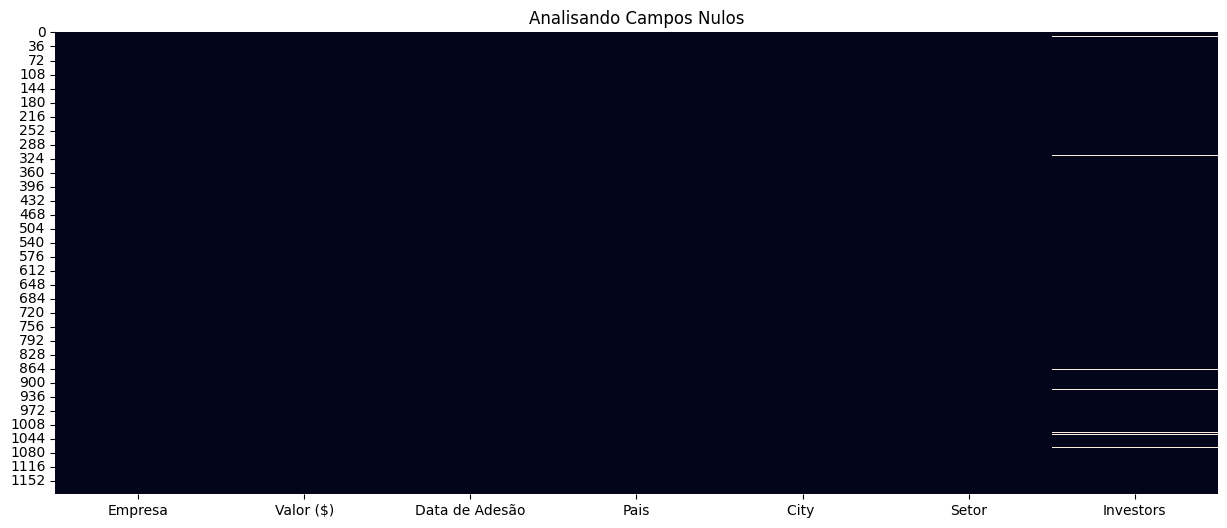

In [28]:
# Grafica
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [29]:
# Campos unicos
Base_Dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investors         1152
dtype: int64

In [30]:
# Valores Unicos
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [31]:
# Valores Unicos - Rank
Base_Dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [32]:
# Valores Unicos - Rank
Base_Dados['Setor'].value_counts( normalize=True )

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

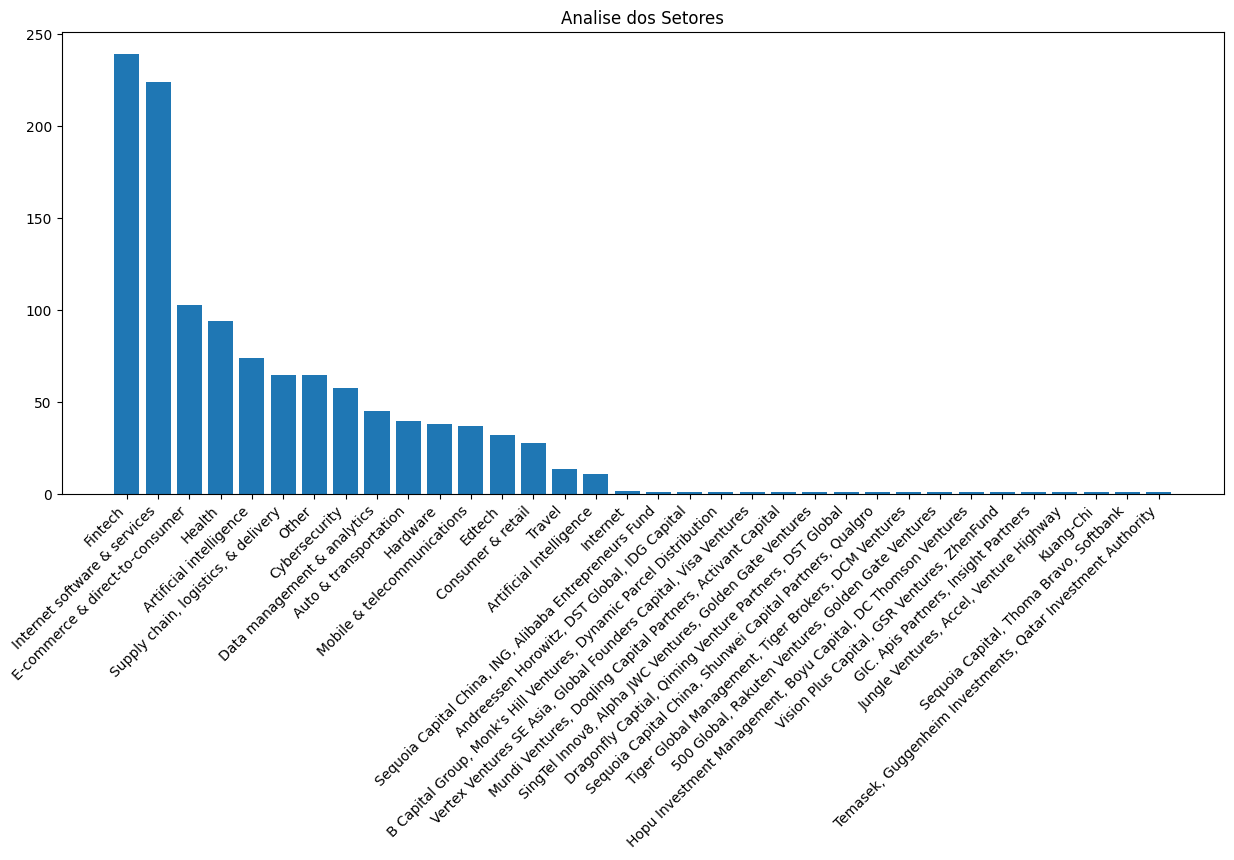

In [33]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [34]:
Analise = round( Base_Dados['Pais'].value_counts( normalize=True ) * 100, 1 )

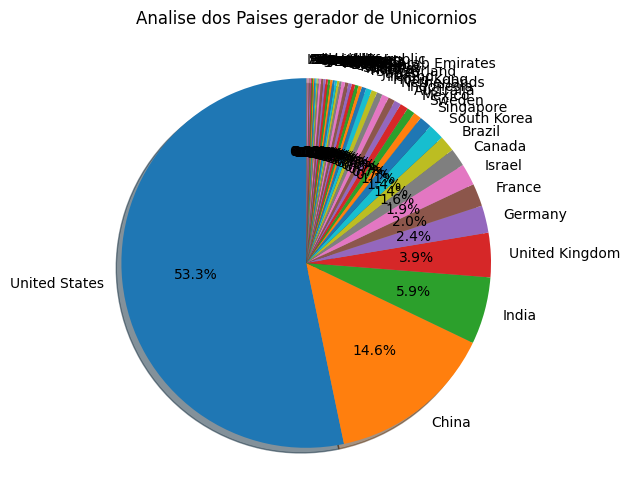

In [35]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

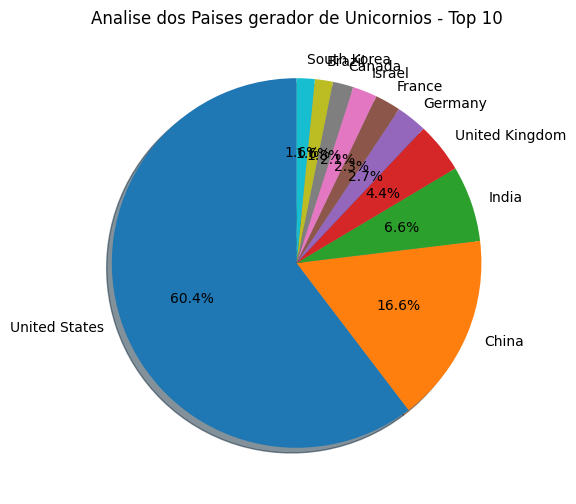

In [36]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios - Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [37]:
# Conversão para Data
Base_Dados['Data de Adesão'] = pd.to_datetime( Base_Dados['Data de Adesão'] )

Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [38]:
# Extrair o Ano e Mes
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).year

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [39]:
# Tabela Analitica
Analise_Agrupada = Base_Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['Id'].reset_index()

Analise_Agrupada

KeyError: 'Id'

In [40]:
#campos unicos 
Base_Dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investors         1152
Mes                 12
Ano                 13
dtype: int64

In [41]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [42]:
#Valores unicos 
Base_Dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

<BarContainer object of 34 artists>

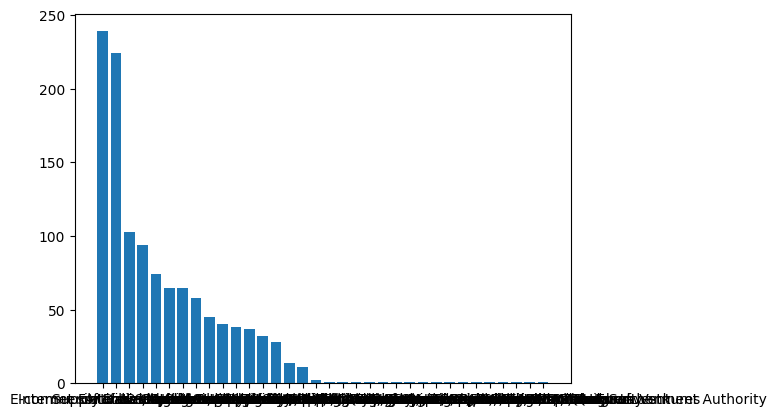

In [43]:
plt.bar(Base_Dados['Setor'].value_counts().index,Base_Dados['Setor'].value_counts())

<BarContainer object of 34 artists>

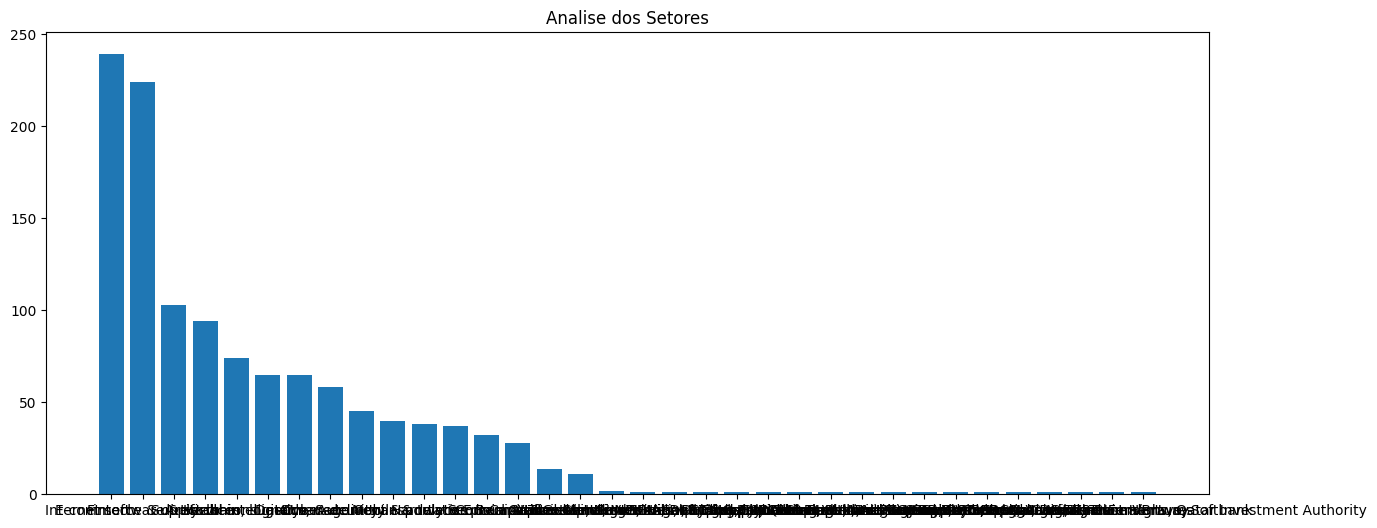

In [44]:
plt.figure(figsize=(15,6))
plt.title('Analise dos Setores')
plt.bar(Base_Dados['Setor'].value_counts().index,Base_Dados['Setor'].value_counts())

In [45]:
Base_Dados['Pais']

0               China
1       United States
2               China
3       United States
4           Australia
            ...      
1181            India
1182    United States
1183    United States
1184    United States
1185    United States
Name: Pais, Length: 1186, dtype: object

In [46]:
Base_Dados['Pais'].value_counts(normalize=True)

United States           0.536256
China                   0.146712
India                   0.059022
United Kingdom          0.038786
Germany                 0.024452
France                  0.020236
Israel                  0.018550
Canada                  0.016020
Brazil                  0.014334
South Korea             0.014334
Singapore               0.010961
Sweden                  0.006745
Mexico                  0.006745
Australia               0.006745
Indonesia               0.005902
Netherlands             0.005902
Hong Kong               0.005902
Ireland                 0.005059
Japan                   0.005059
Switzerland             0.005059
Norway                  0.004216
Finland                 0.003373
Spain                   0.003373
Turkey                  0.002530
Colombia                0.002530
Belgium                 0.002530
United Arab Emirates    0.002530
Austria                 0.001686
Lithuania               0.001686
Vietnam                 0.001686
Thailand  

In [47]:
Analise = Base_Dados['Pais'].value_counts(normalize=True) * 100

In [48]:
Analise

United States           53.625632
China                   14.671164
India                    5.902192
United Kingdom           3.878583
Germany                  2.445194
France                   2.023609
Israel                   1.854975
Canada                   1.602024
Brazil                   1.433390
South Korea              1.433390
Singapore                1.096121
Sweden                   0.674536
Mexico                   0.674536
Australia                0.674536
Indonesia                0.590219
Netherlands              0.590219
Hong Kong                0.590219
Ireland                  0.505902
Japan                    0.505902
Switzerland              0.505902
Norway                   0.421585
Finland                  0.337268
Spain                    0.337268
Turkey                   0.252951
Colombia                 0.252951
Belgium                  0.252951
United Arab Emirates     0.252951
Austria                  0.168634
Lithuania                0.168634
Vietnam       

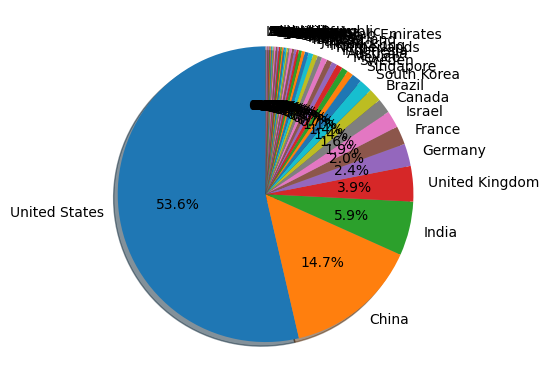

In [49]:
plt.pie(
    Analise,
    labels=Analise.index,
    shadow= True,
    startangle=90,
    autopct='%1.1f%%'
);

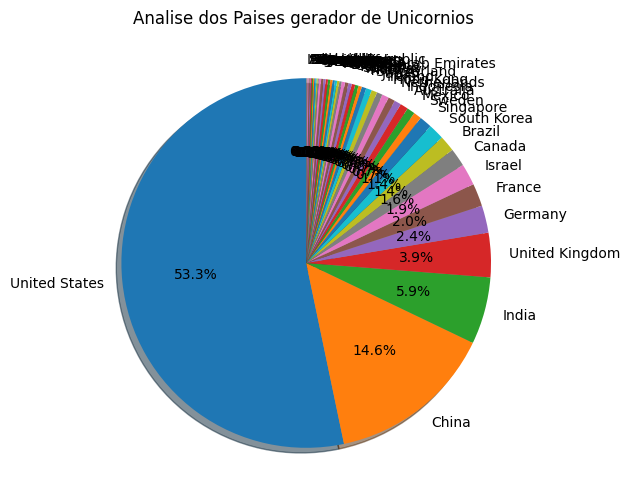

In [ ]:
# Plot geral dos Paises
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios ')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [51]:
#Conversão pra data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

In [55]:
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [59]:
#Extrair pra Ano e Mês 
Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [66]:
#Tabela Analitica 
Analise_Agrupada = Base_Dados.groupby(by=['Pais','Ano','Mes']).count().reset_index()

In [67]:
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Valor ($),Data de Adesão,City,Setor,Investors
14,Brazil,2018,7,1,1,1,1,1,1
15,Brazil,2018,11,1,1,1,1,1,1
16,Brazil,2019,6,1,1,1,1,1,1
17,Brazil,2019,9,1,1,1,1,1,1
18,Brazil,2019,10,1,1,1,1,1,1
19,Brazil,2019,12,1,1,1,1,1,1
20,Brazil,2020,1,1,1,1,1,1,1
21,Brazil,2020,12,2,2,2,2,2,2
22,Brazil,2021,1,1,1,1,1,1,1
23,Brazil,2021,8,2,2,2,2,2,2


In [69]:
Base_Dados['Valor ($)'].apply(lambda Linha :Linha.replace('$',''))

0       140
1       127
2       100
3        95
4        40
       ... 
1181      1
1182      1
1183      1
1184      1
1185      1
Name: Valor ($), Length: 1186, dtype: object

In [70]:
# Transformando a coluna Valor
Base_Dados['Valor ($)'] = pd.to_numeric( Base_Dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
